# Intelligent Agents and Active Inference

### Preliminaries

- Goal 
  - Introduction to Active Inference and application to the design of synthetic intelligent agents 
- Materials        
  - Mandatory
    - These lecture notes
    - Karl Friston - 2016 - [The Free Energy Principle](https://www.youtube.com/watch?v=NIu_dJGyIQI) (video)
  - Optional
    - Raviv (2018), [The Genius Neuroscientist Who Might Hold the Key to True AI](./files/WIRED-Friston.pdf).
        - Interesting article on Karl Friston, who is a leading theoretical neuroscientist working on a theory that relates life and intelligent behavior to physics (and Free Energy minimization). (**highly recommended**) 
    - Friston et al. (2022), [Designing Ecosystems of Intelligence from First Principles](https://arxiv.org/abs/2212.01354)
        - Friston's vision on the future of AI. 
    - Van de Laar and De Vries (2019), [Simulating Active Inference Processes by Message Passing](https://www.frontiersin.org/articles/10.3389/frobt.2019.00020/full)
        - How to implement active inference by message passing in a Forney-style factor graph.

<!---
  - References
    - Friston (2013), [Life as we know it](https://royalsocietypublishing.org/doi/full/10.1098/rsif.2013.0475) 
    - Conant and Ashby (1970), [Every good regulator of a system must be a model of that system](https://www.tandfonline.com/doi/abs/10.1080/00207727008920220)
--->    

### Agents

- In the previous lessons we assumed that a data set was given. 
- In this lesson we consider _agents_. An agent is a system that _interacts_ with its environment through both sensors and actuators.
- Crucially, by acting onto the environment, the agent is able to affect the data that it will sense in the future.
  - As an example, by changing the direction where I look, I can affect the (visual) data that will be sensed by my retina.
- With this definition of an agent, (biological) organisms are agents, and so are robots, self-driving cars, etc.
- In an engineering context, we are particularly interesting in agents that behave with a *purpose* (with a goal in mind), e.g., to drive a car or to design a speech recognition algorithm.
- In this lesson, we will describe how __goal-directed behavior__ by biological (and synthetic) agents can also be interpreted as minimization of a free energy functional. 

### Illustrative Example: the Mountain Car Problem

- In this example, we consider [the mountain car problem](https://en.wikipedia.org/wiki/Mountain_car_problem) which is a classical benchmark problem in the reinforcement learning literature.
- The car aims to drive up a steep hill and park at a designated location. However, its engine is too weak to climb the hill directly. Therefore, a successful agent should first climb a neighboring hill, and subsequently use its momentum to overcome the steep incline towards the goal position. 
- We will assume that the agent's knowledge about the car's process dynamics (i.e., its equations of motion) are known up to some additive Gaussian noise.
- Your challenge is to design an agent that guides the car to the goal position. (The agent should be specified as a probabilistic model and the control signal should be formulated as a Bayesian inference task).  


<p style="text-align:center;"><img src="./ai_agent/agent-cart-interaction2.png" width="600px"></p>

- Solution at the end of this lesson.

### Karl Friston and the Free Energy Principle

- We begin with a motivating example that requires "intelligent" goal-directed decision making: assume that you are an owl and that you're hungry. What are you going to do?

- Have a look at [Prof. Karl Friston](https://www.wired.com/story/karl-friston-free-energy-principle-artificial-intelligence/)'s answer in this  [video segment on the cost function for intelligent behavior](https://youtu.be/L0pVHbEg4Yw). (**Do watch the video!**)

- Friston argues that intelligent decision making (behavior, action making) by an agent requires *minimization of a functional of beliefs*. 

- Friston further argues (later in the lecture and his papers) that this functional is a (variational) free energy (to be defined below), thus linking decision-making and acting to Bayesian inference. 

- In fact, Friston's **Free Energy Principle** (FEP) claims that all [biological self-organizing processes (including brain processes) can be described as Free Energy minimization in a probabilistic model](https://arxiv.org/abs/2201.06387).
  - This includes perception, learning, attention mechanisms, recall, acting and decision making, etc.
  
- Taking inspiration from FEP, if we want to develop synthetic "intelligent" agents, we have (only) two issues to consider:
  1. Specification of the FE functional.
  2. *How* to minimize the FE functional (often in real-time under situated conditions).  

- Agents that follow the FEP are said to be involved in **Active Inference** (AIF). An AIF agent updates its states and parameters (and ultimately its model structure) solely by FE minimization, and selects its actions through (expected) FE minimization (to be explained below).    


### Execution of an AIF Agent

- Consider an AIF agent with observations (sensory states) $x_t$, latent internal states $s_t$ and latent control states $u_t$ for $t=1,2,\ldots$. 

<p style="text-align:center;"><img src="./figures/AIF-agent.png" width="600px"></p>

- The agent is embedded in an environment with "external states" $\tilde{s}_t$. The dynamics of the environment are driven by actions. 

- Actions $a_t$ are selected by the agent. Actions affect the environment and consequently affect future observations. 

- In pseudo-code, an AIF agent executes the <a id="AIF-algorithm"></a>following algorithm:

> **ACTIVE INFERENCE (AIF) AGENT ALGORITHM**    
>
> SPECIFY generative model $p(x,s,u)$    
> ASSUME/SPECIFY environmental process $R$
>
> FORALL t DO    
>     
> 1.  $(x_t, \tilde{s}_t) = R(a_t, \tilde{s}_{t-1})$   % environment generates new observation     
> 2.  $q(s_t) = \arg\min_q F[q]$         % update agent's internal states ("perception")    
> 3.  $q(u_{t+1}) = \arg\min_q H[q]$     % update agent's control states ("actions")    
> 4.  $\hat{u}_{t+1} \sim q(u_{t+1})$; $a_{t+1} = \hat{u}_{t+1}$ % sample next action and push to environment     
>       
> END    


- In the above algorithm, $F[q]$ and $H[q]$ are appropriately defined Free Energy functionals, to be discussed below. Next, we discuss these steps in more details.

### The Generative Model in an AIF agent

- What should the agent's model $p(x,s,u)$ be modeling? This question was (already) answered by [Conant and Ashby (1970)](https://www.tandfonline.com/doi/abs/10.1080/00207727008920220) as the [*good regulator theorem*](https://en.wikipedia.org/wiki/Good_regulator ): **every good regulator of a system must be a model of that system**. See the [OPTIONAL SLIDE for more information](#good-regulator-theorem). 

- Conant and Ashley state: "The theorem has the interesting corollary that the living brain, so far as it is to be successful and efficient as a regulator for survival, __must__ proceed, in learning, by the formation of a model (or models) of its environment."

- Indeed, perception in brains is clearly affected by predictions about sensory inputs by the brain's own generative model.

<p style="text-align:center;"><img src="./figures/the-gardener.png" width="600px"></p>

- In the above picture (The Gardener, by Giuseppe Arcimboldo, ca 1590
), on the left you will likely see a bowl of vegetables, while the same picture upside down elicits with most people the perception of a gardener's face rather than an upside-down vegetable bowl. 

- The reason is that the brain's model predicts to see straight-up faces with much higher probability than upside-down vegetable bowls. 

- So the <a id="model-specification"></a> agent's model $p$ will be a model that aims to explain how environmental causes (latent states) lead to sensory observations.

### Specification of AIF Agent's model and Environmental Dynamics

- In this notebook, for illustrative purposes, we specify the **generative model** at time step $t$ of an AIF agent as 
$$
p(x_t,s_t,u_t|s_{t-1}) = \underbrace{p(x_t|s_t)}_{\text{observations}} \cdot \underbrace{p(s_t|s_{t-1},u_t)}_{\substack{\text{state} \\ \text{transition}}} \cdot \underbrace{p(u_t)}_{\substack{\text{action} \\ \text{prior}}}
$$

- We will assume that the agent interacts with an environment, which we represent by a dynamic model $R$ as
$$
(x_t,\tilde{s}_t) = R\left( a_t,\tilde{s}_{t-1}\right)$$
where $a_t$ are _actions_ (by the agent), $x_t$ are _outcomes_ (the agent's observations) and $\tilde{s}_t$ holds the environmental latent _states_. 

- Note that $R$ only needs to be specified for simulated environments. If we were to deploy the agent in a real-world environment, we would not need to specify $R$. 

- The agent's knowledge about environmental process $R$ is expressed by its generative model $p(x_t,s_t,u_t|s_{t-1})$. 

- Note that we distinguish between _control states_ and _actions_. Control states $u_t$ are latent variables in the agent's generative model. An action $a_t$ is a realization of a control state as observed by the environment. 

- Observations $x_t=\hat{x}_t$ are generated by the environment and observed by the agent. Vice versa, actions $a_t = \hat{u}_t$ are generated by the agent and observed by the environment. 

### State Updating in the AIF Agent

- After the agent makes a new observation $x_t=\hat{x}_t$, it will update beliefs over its latent variables. First the internal state variables $s$. 

- Assume the following at time step $t$:
  - the state of the agent's model has already been updated to $q(s_{t-1}|\hat{x}_{1:t-1})$. 
  - the agent has selected a new action $a_t=\hat{u}_t$.
  - the agent has recorded a new observation $x_t=\hat{x}_t$. 

- The **state updating** task is to infer $q(s_{t}|\hat{x}_{1:t})$, based on the previous estimate $q(s_{t-1}|\hat{x}_{1:t-1})$, the new data $\{a_t=\hat{u}_t,x_t=\hat{x}_{t}\}$, and the agent's generative model. 

- Technically, this is a Bayesian filtering task. In a real brain, this process is called **perception**.   

- We specify the following FE functional
$$
F[q] = \sum_{s_t} q(s_t|\hat{x}_{1:t}) \log \frac{\overbrace{q(s_t|\hat{x}_{1:t})}^{\text{state posterior}}}{\underbrace{p(\hat{x}_t|s_t) p(s_t|s_{t-1},\hat{u}_t)}_{\text{generative model w new data}} \underbrace{q(s_{t-1}|\hat{x}_{1:t-1})}_{\text{state prior}}}
$$

- The state updating task can be formulated as minimization of the above FE (see also [AIF Algorithm](#AIF-algorithm), step 2):
$$
q(s_t|\hat{x}_{1:t}) = \arg\min_q F[q]
$$

- In case the generative model is a _Linear Gaussian Dynamical System_, minimization of the FE can be solved analytically in closed-form and [leads to the standard Kalman filter](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Dynamic-Models.ipynb#kalman-filter). 

- In case these (linear Gaussian) conditions are not met, we can still minimize the FE by other means and arrive at some approximation of the Kalman filter, see for example [Baltieri and  Isomura (2021)](https://arxiv.org/abs/2111.10530) for a Laplace approximation to variational Kalman filtering.  

- Our toolbox [RxInfer](http://rxinfer.ml) specializes in automated execution of  this minimization task. 


### Policy Updating in an AIF Agent

- Once the agent has updated its internal states, it will turn to inferring the next action. 

- In order to select a __good__ next action, we need to investigate and compare consequences of a _sequence_ of future actions. 

- A sequence of future actions $a= (a_{t+1}, a_{t+2}, \ldots, a_{t+T})$ is called a **policy**. Since relevant consequences are usually the result of an future action sequence rather than a single action, we will be interested in updating beliefs over policies. 

- In order to assess the consequences of a selected policy, we will, as a function of that policy, run the generative model forward-in-time to make predictions about future observations $x_{t+1:t+T}$. 

- Note that perception (state updating) preceeds policy updating. In order to accurately predict the future, the agent first needs to understand the current state of the world.  

- Consider an AIF agent at time step $t$ with (future) observations $x = (x_{t+1}, x_{t+2}, \ldots, x_{t+T})$,  latent future internal states $s= (s_t, s_{t+1}, \ldots, s_{t+T})$, and latent future control variables $u= (u_{t+1}, u_{t+2}, \ldots, u_{t+T})$. 

- From the agent's viewpoint, the evolution of these future variables are constrained by its generative model, rolled out into the future:
$$\begin{align*}
p(x,s,u) &= \underbrace{q(s_{t})}_{\substack{\text{current}\\ \text{state}}} \cdot \underbrace{\prod_{k=t+1}^{t+T} p(x_k|s_k) \cdot p(s_k | s_{k-1}, u_k) p(u_k)}_{\text{GM roll-out to future}}
\end{align*}$$

- Consider the Free Energy functional for estimating posterior beliefs $q(s,u)$ over latent future states and latent control signals: 
$$\begin{align*}
H[q] &= \overbrace{\sum_{x,s} q(x|s)}^{\text{marginalize }x} \bigg( \overbrace{\sum_u q(s,u) \log \frac{q(s,u)}{p(x,s,u)} }^{\text{"regular" variational Free Energy}}\bigg) \\
&= \sum_{x,s,u} q(x,s,u) \log \frac{q(s,u)}{p(x,s,u)}
\end{align*}$$

- In principle, this is a regular FE functional, with one difference to previous versions: since future observations $x$ have not yet occurred, $H[q]$ marginalizes not only over latent states $s$ and policies $u$, but also over future observations $x$.

- We will update the beliefs over policies by minimization of Free Energy functional $H[q]$. In the [optional slides below, we prove that the solution to this optimization task](#q-star) is given by (see [AIF Algorithm](#AIF-algorithm), step 3, above)
$$\begin{aligned}
q^*(u) &= \arg\min_q H[q] \\
&\propto p(u)\exp(-G(u))\,,
\end{aligned}$$
<a id='q-star-main-cell'></a> where the factor $p(u)$ is a prior over admissible policies, and the factor $\exp(-G(u))$ updates the prior with information about future consequences of a selected policy $u$. 

- The function 
$$G(u) = \sum_{x,s}  q(x,s|u) \log \frac{q(s|u)}{p(x,s|u)}$$ 
is called the **Expected Free Energy** (EFE) for policy $u$. 

- The FEP takes the following stance: if FE minimization is all that an agent does, then the only consistent and appropriate behavior for an agent is to select actions that minimize the **expected** Free Energy in the future (where expectation is taken over current beliefs about future observations). 

- Note that, since $q^*(u) \propto p(u)\exp(-G(u))$, the probability $q^*(u)$ for selecting a policy $u$ increases when EFE $G(u)$ gets smaller. 

- Once the policy (control) variables have been updated, in simulated environments, it is common to assume that the next action $a_{t+1}$ (an action is the _observed_ control variable by the environment) gets selected in proportion to the probability of the related control variable (see [AIF Agent Algorithm](#AIF-algorithm), step 4, above), i.e.,
$$\begin{aligned}
\hat{u}_{t+1} &\sim q(u_{t+1}) \qquad &&\text{(select control realization by sampling)} \\
a_{t+1} &= \hat{u}_{t+1} \qquad &&\text{(transfer to environment)}
\end{aligned}$$

- Next, we analyze some properties of the EFE.

### Active Inference Analysis: exploitation-exploration dilemma 

- Consider the following decomposition of EFE:
$$\begin{aligned}
G(u) &= \sum_{x,s}  q(x,s|u) \log \frac{q(s|u)}{p(x,s|u)} \\
&= \sum_{x,s} q(x,s|u) \log \frac{1}{p(x)} + \sum_{x,s} q(x,s|u) \log \frac{q(s|u)}{p(s|x,u)}\frac{q(s|x)}{q(s|x)} \\
&= \sum_x q(x|u) \log \frac{1}{p(x)} + \sum_{x,s} q(x,s|u) \log \frac{q(s|u)}{q(s|x)} + \underbrace{\sum_{x,s} q(x,s|u) \log \frac{q(s|x)}{p(s|x,u)}}_{E\left[ D_{\text{KL}}[q(s|x),p(s|x,u)] \right]\geq 0} \\
&\geq \underbrace{\sum_x q(x|u) \log \frac{1}{p(x)}}_{\substack{\text{goal-seeking behavior} \\ \text{(exploitation)}}} - \underbrace{\sum_{x,s} q(x,s|u) \log \frac{q(s|x)}{q(s|u)}}_{\substack{\text{information-seeking behavior}\\ \text{(exploration)}}} 
\end{aligned}$$ 

- Apparently, minimization of EFE leads to selection of policies that balances the following two imperatives: 

  1. minimization of the first term of $G(u)$, i.e. minimizing $\sum_x q(x|u) \log \frac{1}{p(x)}$, leads to policies ($u$) that align the inferred observations $q(x|u)$ under policy $u$ (i.e., predicted future observations under policy $u$) with a prior $p(x)$ on future observations. We are in control to choose any prior $p(x)$ and usually we choose a prior that aligns with desired (goal) observations. Hence, policies with low EFE leads to **<a id="goal-seeking">goal-seeking behavior</a>** (a.k.a. pragmatic behavior or exploitation). [In the OPTIONAL SLIDES](#ambiguity-plus-risk), we derive an alternative (perhaps clearer) expression to support this interpretation]. 
  
  1. minimization of $G(u)$ maximizes the second term 
  $$\begin{aligned}
  \sum_{x,s} q(x,s|u) \log \frac{q(s|x)}{q(s|u)} &= \sum_{x,s} q(x,s|u) \log \frac{q(s|x)}{q(s|u)}\frac{q(x|u)}{q(x|u)} \\
  &= \underbrace{\sum_{x,s} q(x,s|u) \log \frac{q(x,s|u)}{q(x|u)q(s|u)}}_{\text{(conditional) mutual information }I[x,s|u]}
  \end{aligned}$$ 
  which is the (conditional) [__mutual information__](https://en.wikipedia.org/wiki/Mutual_information) between (posteriors on) future observations and states, for a given policy $u$. Thus, maximizing this term leads to actions that maximize statistical dependency between future observations and states. In other words, a policy with low EFE also leads to **information-seeking behavior** (a.k.a. epistemic behavior or exploration). 

- (The third term $\sum_{x,s} q(x,s|u) \log \frac{q(s|x)}{p(s|x)}$ is an (expected) KL divergence between posterior and prior on the states. This can be interpreted as a complexity/regularization term and $G(u)$ minimization will drive this term to zero.)   

- Seeking actions that balance goal-seeking behavior (exploitation) and information-seeking behavior (exploration) is a [fundamental problem in the Reinforcement Learning literature](https://en.wikipedia.org/wiki/Exploration-exploitation_dilemma). 

- **Active Inference solves the exploration-exploitation dilemma**. Both objectives are served by EFE minimization without any need for tuning parameters. 

### AIF Agents learn both the Problem and Solution

- We highlight another great feature of FE minimizing agents. Consider an AIF agent ($m$) with generative model $p(x,s,u|m)$.

- Consider the Divergence-Evidence decomposition of the FE again:

$$\begin{aligned}
F[q] &= \sum_{s,u} q(s,u) \log \frac{q(s,u)}{p(x,s,u|m)} \\
&= \underbrace{-\log p(x|m)}_{\substack{\text{problem} \\ \text{representation costs}}} + \underbrace{\sum_{s,u} q(s,u) \log \frac{q(s,u)}{p(s,u|x,m)}}_{\text{solution costs}}
\end{aligned}$$

- The first term, $-\log p(x|m)$, is the (negative log-) evidence for model $m$, given recorded data $x$. 

- Minimization of FE maximizes the evidence for the given model. The model captures the  **problem representation**. A model with high evidence predicts the data well and therefore "understands the world".  

- The second term scores the cost of inference. In almost all cases, the solution to a problem can be phrased as an inference task on the generative model. Hence, the second term **scores the accuracy of the inferred solution**, for the given model. 

- FE minimization optimizes a balanced trade-off between a good-enough problem representation and a good-enough solution proposal for that model. Since FE comprises both a cost for solution _and_ problem representation, it is a neutral criterion that applies across a very wide set of problems. 

- A good solution to the wrong problem is not good enough. A poor solution to a great problem statement is not sufficient either.  In order to solve a problem well, we need both to represent the problem correctly (high model evidence) and we need to solve it well (low inference costs). 

<!---
- Question: does this argument suggest that FE is even more fundamental as a model performance criterion than the model evidence by itself?
--->

### The Brain's Action-Perception Loop by FE Minimization

- The above derivations are not trivial, but we have just shown that FE-minimizing agents accomplish variational Bayesian perception (a la Kalman filtering), and a balanced exploration-exploitation trade-off for policy selection. 

- Moreover, the FE by itself serves as a proper objective across a very wide range of problems, since it scores both the cost of the problem statement and the cost of inferring the solution. 

- The current FEP theory claims that minimization of FE (and EFE) is all that brains do, i.e., FE minimization leads to perception, policy selection, learning, structure adaptation, attention, learning of problems and solutions, etc.

<p style="text-align:center;"><img style="border:2px solid #000000; width:auto" src="./figures/brain-design-cycle.png"></p>

### The Engineering Challenge: Synthetic AIF Agents 

- We have here a framework (the FEP) for emergent intelligent behavior in self-organizing biological systems that
  - leads to optimal (Bayesian) information processing, including balancing accuracy vs complexity.
  - leads to balanced and continual learning of both problem representation and solution proposal
  - actively selects data in-the-field under situated conditions (no dependency on large data base)
  - pursues a optimal trade-off between exploration (information-seeking) and exploitation (goal-seeking) behavior
  - needs no external tuning parameters (such as step sizes, thresholds, etc.)

- Clearly, the FEP, and synthetic AIF agents as a realization of FEP, comprise a very attractive framework for all things relating to AI and AI agents. 

- A current big AI challenge is to design synthetic AIF agents based solely on FE/EFE minimization.

<p style="text-align:center;"><img style="border:2px solid #000000; width:auto" src="./figures/Synthetic-FEP-agent.png"></p> 

- Executing a synthetic AIF agent often poses a large computational problem because of the following reasons: 
   1. For interesting problems (e.g. speech recognition, scene analysis), generative models may contain thousands of latent variables. 
   2. The FE function is a time-varying function, since it is also a function of observable variables. 
   3. An AIF agent must execute inference in real-time if it is engaged and embedded in a real world environment.
   
- So, in practice, executing a synthetic AIF agent may lead to a **task of minimizing a time-varying FE function of thousands of variables in real-time**!!


### Factor Graph Approach to Modeling of an Active Inference Agent

- How to specify and execute a synthetic AIF agent is an active area of research. 

- There is no definitive solution approach to AIF agent modeling yet; we ([BIASlab](http://biaslab.org)) think that (reactive) message passing in a factor graph representation provides a promising path. 

- After selecting an action $a_t$ and making an observation $x_t$, the FFG for the rolled-out generative model is given by the following FFG:

<p style="text-align:center;"><img src="./figures/fig-active-inference-model-specification.png" width="600px"></p>

- The open red nodes for $p(x_{t+k})$ specify __desired future observations__, whereas the open black boxes for $p(s_k|s_{k-1},u_k)$ and $p(x_k|s_k)$ reflect the agent's beliefs about how the world actually evolves (ie, the __veridical model__). 

- The (brown) dashed box is the agent's Markov blanket. Given the states on the Markov blanket, the internal states of the agent are independent of the state of the world.   


### How to minimize FE: Online Active Inference

- [Online active inference proceeds by iteratively executing three stages](https://www.frontiersin.org/articles/10.3389/frobt.2019.00020/full): 
  1. act-execute-observe     
  2. update the latent variables and select an action    
  3. slide forward

<p style="text-align:center;"><img src="./figures/fig-online-active-inference.png" width="700px"></p>

### The Mountain car Problem Revisited

Here we solve the mountain car problem as stated at the beginning of this lesson. Before implementing the active inference agent, let's first perform a naive approach that executes the engine's maximum power to reach the goal. As can be seen in the results, this approach fails since the car's engine is not strong enough to reach the goal directly. 

For implementing the active inference agent, we first specify a probabilistic generative model for the agent's environment and then constrain future observations by a prior distribution that is located on the target position. We then execute the (1) Act-execute-observe --> (2) infer --> (3) slide procedures as discussed above to infer future actions. 

We interpret the environmental state $z_t = [\theta , \theta \dot ]$ as the respective position and velocity of the car.




In [1]:
using Pkg; Pkg.activate("../."); Pkg.instantiate();
using IJulia; try IJulia.clear_output(); catch _ end

  Activating project at `~/github/bertdv/BMLIP/lessons`


In [4]:
using LinearAlgebra, Plots, RxInfer
import .ReactiveMP: getrecent, messageout
include("./scripts/mountaincar_helper.jl")

function initializeWorld()
    z_0 = [-0.5, 0.0] # Initial position
    z_t_min = z_0  
    function execute(a_t::Float64)
        z_t = dzdt(z_t, a_t) # state transition
        z_t_min = z_t 
        return z_t
    end
    z_t = [-0.5, 0.0] # Predefine outcome variable
    observe() = z_t   # Report current position
    return (execute, observe)
end

# The probablistic generative model
@model function car(T)
    # model parameters
    Gamma = 1e10*diageye(2) # Transition precision
    Theta = 1e-4*diageye(2) # Observation variance
    
    m_s_t_min = datavar(Vector{Float64})
    V_s_t_min = datavar(Matrix{Float64})

    s_t_min ~ MvNormal(mean = m_s_t_min, cov = V_s_t_min)
    s_k_min = s_t_min
    
    m_u = datavar(Vector{Float64}, T)
    V_u = datavar(Matrix{Float64}, T)
    
    m_x = datavar(Vector{Float64}, T)
    V_x = datavar(Matrix{Float64}, T)
    
    u = randomvar(T)
    s = randomvar(T)
    x = randomvar(T)
    
    s_u = randomvar(T)
    
    # roll generative model forward in time
    for k in 1:T
        u[k] ~ MvNormal(mean = m_u[k], cov = V_u[k]) # Control model
        s_u[k] ~ dzdt(s_k_min, u[k]) # Transition with new control
        s[k] ~ MvNormal(mean = s_u[k], precision = Gamma)  # State transition model
        x[k] ~ MvNormal(mean = s[k], covariance = Theta) # Observation model
        s_k_min = s[k]
    end

    # set constraint on future observations
    for k in 1:T
        x[k] ~ MvNormal(mean = m_x[k], covariance = V_x[k]) # Goal prior
    end
    
    return (s, )
end

@meta function car_meta()
    dzdt() -> DeltaMeta(method = Linearization())
end

function initializeAgent(T)
    Epsilon = fill(huge, 1, 1) # Control prior variance
    m_u = Vector{Float64}[ [ 0.0] for k=1:T ] # Set control priors
    V_u = Matrix{Float64}[ Epsilon for k=1:T ]

    x_target = [0.5, 0.0] # Goal state
    Sigma = 1e-12*diageye(2) # Goal prior variance
    m_x = [zeros(2) for k=1:T]
    V_x = [huge*diageye(2) for k=1:T]
    V_x[end] = Sigma # Set prior to reach goal at t=T

    m_s_t_min = [-0.5, 0.0] # Set initial state prior
    V_s_t_min = tiny*diageye(2)
    
    result = nothing

    # Initialize messages and marginals dictionary
    
    function infer(upsilon_t::Float64, y_hat_t::Vector{Float64})
        m_u[1] = [ upsilon_t ] # Register action with the generative model
        V_u[1] = fill(tiny, 1, 1) # Clamp control prior to performed action

        m_x[1] = y_hat_t # Register observation with the generative model
        V_x[1] = tiny*diageye(2) # Clamp goal prior to observation

        data = Dict(:m_u       => m_u, 
                    :V_u       => V_u, 
                    :m_x       => m_x, 
                    :V_x       => V_x,
                    :m_s_t_min => m_s_t_min,
                    :V_s_t_min => V_s_t_min)

        result = inference(
            model = car(T),
            meta = car_meta(),
            data = data,
        )
    end
    
    function act() 
        if result !== nothing
            return mode(result.posteriors[:u][2])[1]
        else
            return 0.0
        end
    end

    function slide(slide_msg_idx = 3)
        (s, ) = result.returnval
        (m_s_t_min, V_s_t_min) = mean_cov(getrecent(messageout(s[2], slide_msg_idx))) # Reset prior state statistics;

        m_u = circshift(m_u, -1)
        m_u[end] = [0.0]
        V_u = circshift(V_u, -1)
        V_u[end] = Epsilon

        m_x = circshift(m_x, -1)
        m_x[end] = x_target
        V_x = circshift(V_x, -1)
        V_x[end] = Sigma
    end 
        return (infer, act, slide) 
end

initializeAgent (generic function with 1 method)

Plots.AnimatedGif("/Users/bert/github/bertdv/BMLIP/lessons/notebooks/ai_agent/ MountainCar_naive_policy.gif")
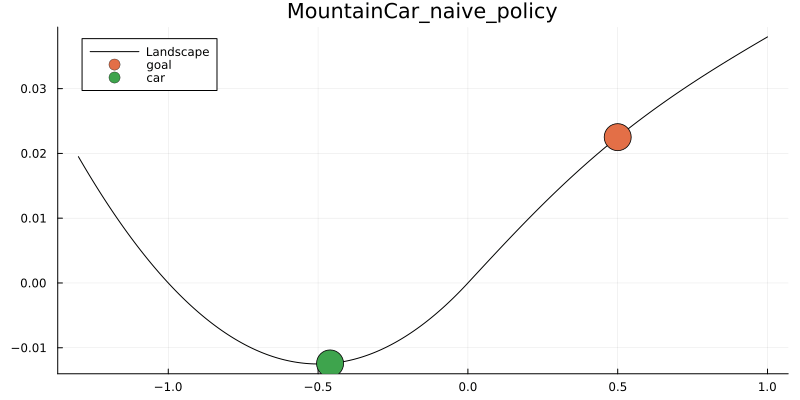

In [5]:
# Simulation for the naive policy of going full power up the right slope 
N = 40 # Total simulation time

(execute, observe)  = initializeWorld() # Let there be a world
y = Vector{Vector{Float64}}(undef, N) # Observations

for n in 1:N
    execute(100.0) # Act with the maximum power 
    y[n] = observe() # Observe the current environmental outcome
end

plot_car(y,"MountainCar_naive_policy")

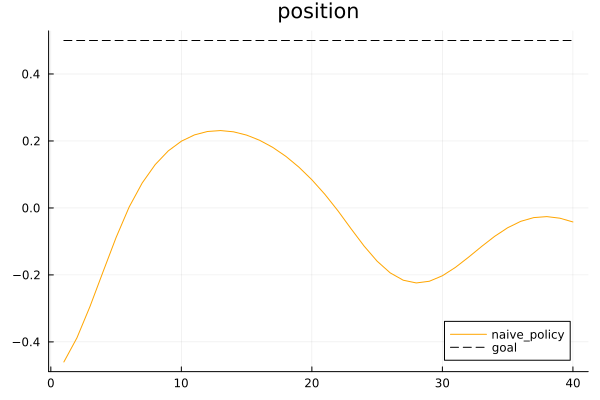

In [6]:
trajectories = reduce(hcat,y)'
plot(trajectories[:,1], label="naive_policy", title = "position", color = "orange")
plot!(0.5 * ones(N), color = "black", linestyle=:dash, label = "goal")

Plots.AnimatedGif("/Users/bert/github/bertdv/BMLIP/lessons/notebooks/ai_agent/ MountainCar_active_inference.gif")
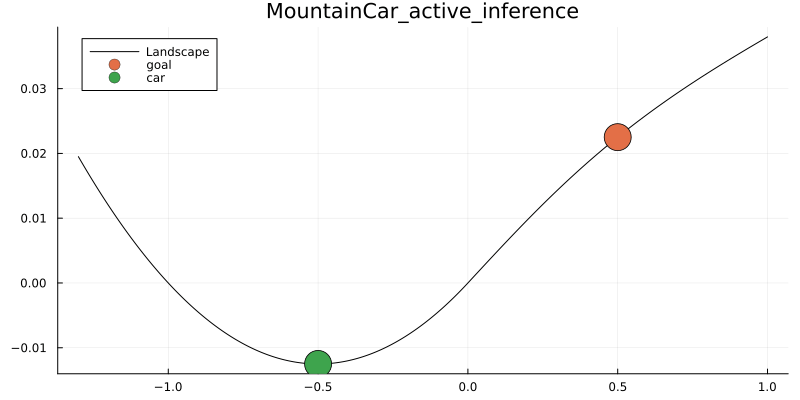

In [8]:
T = 25 # Time horizon (Lookahead)
(execute, observe)  = initializeWorld() # Let there be a world
(infer, act, slide) = initializeAgent(T) # Let there be an agent

# Step through experimental protocol
a2 = Vector{Float64}(undef, N) # Actions
y2 = Vector{Vector{Float64}}(undef, N) # Observations
for n in 1:N
    a2[n] = act() # Evoke an action from the agent
    execute(a2[n]) # The action influences hidden external states
    y2[n] = observe() # Observe the current environmental outcome (update p)
    infer(a2[n], y2[n]) # Infer beliefs from current model state (update q)
    slide() # Prepare for next iteration
end
plot_car(y2,"MountainCar_active_inference")

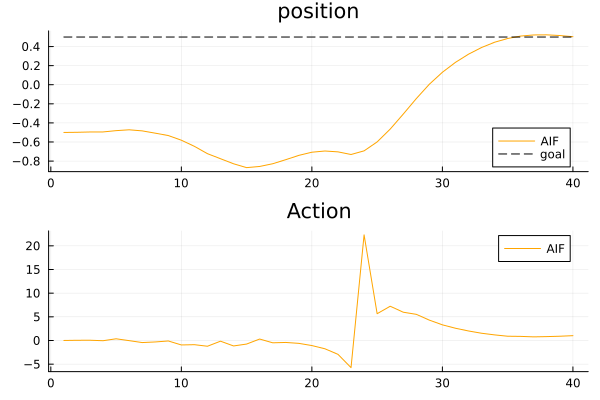

In [9]:
trajectories = reduce(hcat,y2)'
p1 = plot(trajectories[:,1], label="AIF", title = "position", color = "orange")
plot!(0.5 * ones(N), color = "black", linestyle=:dash, label = "goal")
p2 = plot(a2, label="AIF", title = "Action", color = "orange")
plot(p1,p2, layout = @layout [a ; b])

### Extensions and Comments


- Just to be sure, you don't need to memorize all FE/EFE decompositions nor are you expected to derive them on-the-spot. We present these decompositions only to provide insight into the multitude of forces that underlie FEM-based action selection.

- In a sense, the FEP is an umbrella for describing the mechanics and self-organization of intelligent behavior, in man and machines. Lots of sub-fields in AI, such as reinforcement learning, can be interpreted as a special case of active inference under the FEP, see e.g., [Friston et al., 2009](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0006421). 

- Is EFE minimization really different from "regular" FE minimization? Not really, it appears that [EFE minimization can be reformulated as a special case of FE minimization](https://link.springer.com/article/10.1007/s00422-019-00805-w). In other words, FE minimization is still the only game in town.

- Active inference also completes the "scientific loop" picture. Under the FEP, experimental/trial design is driven by EFE minimization. Bayesian probability theory (and FEP) contains all the equations for running scientific inquiry.
<p style="text-align:center;"><img style="width:auto" src="./figures/scientific-inquiry-loop-complete.png"></p>

- The big engineering challenge remains the computational load of AIF. The human brain consumes about 25 Watt and the neocortex only about 4 Watt (which is about the power consumption of a bicycle light). This is multiple orders of magnitude cheaper than what we can engineer on silicon for similar tasks.    

<!--- 
- In the next class, we make a lightweight excursion to brains and life. What is life? 
--->






### Final Thoughts

- In the end, all the state inference, parameter estimation, etc., in this lecture series could have been implemented by FE minimization in an appropriately specified generative probabilistic model. However, the Free Energy Principle extends beyond state and parameter estimation. Driven by FE minimization, brains change their structure as well over time. In fact, the FEP extends beyond brains to a general theory for biological self-organization, e.g., [Darwin's natural selection process](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5857288/) may be interpreted as a FE minimization-driven model optimization process, and here's an article on [FEP for predictive processing in plants](https://royalsocietypublishing.org/doi/10.1098/rsif.2017.0096). Moreover, Constrained-FE minimization (rephrased as the Principle of Maximum Relative Entropy) provides an elegant framework to derive most (if not all) physical laws, as Caticha exposes in his [brilliant monograph](./files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics) on Entropic Physics. Indeed, the framework of FE minimization is known in the physics community as the very fundamental [Principle of Least Action](https://en.wikipedia.org/wiki/Stationary-action_principle) that governs the equations-of-motion in nature. 

- So, the FEP is very fundamental and extends way beyond applications to machine learning. At [our research lab](http://biaslab.org) at TU/e, we work on developing FEP-based intelligent agents that go out into the world and autonomously learn to accomplish a pre-determined task, such as learning-to-walk or learning-to-process-noisy-speech-signals. Free free to approach us if you want to know more about that effort.    

## <center>OPTIONAL SLIDES</center>



### In an AIF Agent, Actions fulfill Desired Expectations about the Future

- In the [derivations above](#goal-seeking), we decomposed the EFE into an upperbound on the sum of a goal-seeking and information-seeking term. Here, we derive an alternative (exact) decomposition that more clearly reveals the goal-seeking objective</a>.

- We consider again the EFE and factorize the generative model $p(x,s|u) = p^\prime(x) p(s|x,u)$ as a product of a __target prior__ $p^\prime(x)$ on observations and a __veridical__ state model $p(s|x,u)$. 

- Through the __target prior__ $p^\prime(x)$, the agent declares which observations it **wants** to observe in the future. (The prime is just to distinguish the semantics of a desired future from the model for the actual future).

- Through the __veridical__ state model $p(s|x,u)$ , the agent implicitly declares its beliefs about how the world will **actually** generate observations.
  - In particular, note that through the equality (by Bayes rule)
$$p(s|x,u) = \frac{p(x|s)p(s|u)}{p(x|u)} = \frac{p(x|s)p(s|u)}{\sum_s p(x|s)p(s|u)}\,,$$ 
it follows that in practice the agent may specify $p(s|x,u)$ implicitly by explicitly specifying a state transition model $p(s|u)$ and observation model $p(x|s)$. 

- Hence, an AIF agent holds both a model for its beliefs about how the world will actually evolve AND a model for its beliefs about how it desires the world to evolve!! 

- <a id="ambiguity-plus-risk"></a> To highlight the role of these two models in the EFE, consider the following alternative EFE decomposition:
$$\begin{aligned}
G(u) &= \sum_{x,s}  q(x,s|u) \log \frac{q(s|u)}{p^\prime(x)p(s|x,u)} \\
&= \sum_{x,s}  q(x,s|u) \log \frac{q(s|u)}{p^\prime(x)} \frac{1}{p(s|x,u)}\\
&= \sum_{x,s}  q(x,s|u) \log \frac{q(s|u)}{p^\prime(x)} \frac{p(x|u)}{p(x|s)p(s|u)} \quad \text{(use Bayes)}\\
&= \sum_{x,s}  q(x,s|u) \log \frac{q(s|u)}{p(x|s)p(s|u)} \frac{p(x|u)}{p^\prime(x)} \\
&= \sum_{x,s}  q(x,s|u) \log \frac{q(s|u)}{p(x|s)p(s|u)} + \sum_{x,s} q(x,s|u) \log \frac{p(x|u)}{p^\prime(x)} \\
&= \sum_{x,s}  p(s|u) p(x|s) \log \frac{\cancel{p(s|u)}}{p(x|s)\cancel{p(s|u)}} + \sum_{x,s} p(s|u) p(x|s) \log \frac{p(x|u)}{p^\prime(x)} \quad \text{( assume }q(x,s|u)=p(x|s)p(s|u)\text{ )}\\
&= \sum_{s}  p(s|u) \sum_x p(x|s) \log \frac{1}{p(x|s)} + \sum_x p(x|u) \log \frac{p(x|u)}{p^\prime(x)} \\
&= \underbrace{E_{p(s|u)}\left[ H[p(x|s)]\right]}_{\text{ambiguity}} + \underbrace{D_{\text{KL}}\left[ p(x|u), p^\prime(x)\right]}_{\text{risk}}
\end{aligned}$$

- In this derivation, we have assumed that we can use the generative model to make inferences in the "forward" direction. Hence, $q(s|u)=p(s|u)$ and $q(x|s)=p(x|s)$.  

- The terms "ambiguity" and "risk" have their origin in utility theory for behavioral ecocomics. Minimization of EFE leads to minimizing both ambiguity and risk.

- Ambiguous (future) states are states that map to large uncertainties about (future) observations. We want to avoid those ambiguous states since it implies that the model is not capable to predict how the world evolves. Ambiguity can be resolved by selecting information-seeking (epistemic) actions. 

- Minimization of the second term (risk) leads to choosing actions ($u$) that align **predicted** future observations (represented by $p(x|u)$) with **desired** future observations (represented by $p^\prime(x)$). Agents minimize risk by selecting pragmatic (goal-seeking) actions.

- $\Rightarrow$ **Actions fulfill desired expectations about the future!**

- ([return to related cell in main text](#goal-seeking)).

### Proof $q^*(u) = \arg\min_q H[q] \propto p(u)\exp(-G(u))$ 

- <a id='q-star'></a>Consider the following decomposition:
$$\begin{aligned}
H[q] &= \sum_{x,s,u} q(x,s,u) \log \frac{q(s,u)}{p(x,s,u)} \\
&= \sum_{x,s,u} q(x,s|u) q(u) \log \frac{q(s|u) q(u)}{p(x,s|u) p(u)} \\
&= \sum_{u} q(u) \bigg(\sum_{x,s} q(x,s|u) \log \frac{q(s|u) q(u)}{p(x,s|u) p(u)}\bigg) \\
&= \sum_{u} q(u) \bigg( \log q(u) + \log \frac{1}{p(u)}+ \underbrace{\sum_{x,s} q(x,s|u) \log \frac{q(s|u)}{p(x,s|u)}}_{G(u)}\bigg) \\
&= \sum_{u} q(u) \log \frac{q(u)}{p(u)\exp\left(- G(u)\right) }
\end{aligned}$$

- This is a KL-divergence. Minimization of $H[q]$ leads to the following posterior for the policy:
$$\begin{aligned}
q^*(u) &= \arg\min_q H[q] \\
&= \frac{1}{Z}p(u)\exp(-G(u))
\end{aligned}$$

- [(click to return to linked cell in the main text.)](#q-star-main-cell)

### What Makes a Good Agent? [The Good Regulator Theorem](https://en.wikipedia.org/wiki/Good_regulator)

- <a id="good-regulator-theorem"></a> According to Friston, an ``intelligent'' agent like a brain minimizes a variational free energy functional, which, in general, is a functional of a probability distribution $p$ and a variational posterior $q$. 

- What should the agent's model $p$ be modeling? This question was (already) answered by [Conant and Ashby (1970)](https://www.tandfonline.com/doi/abs/10.1080/00207727008920220) as the Good Regulator Theorem: **every good regulator of a system must be a model of that system**. 
  
- A Quote from Conant and Ashby's paper (this statement was later finessed by [Friston (2013)](https://royalsocietypublishing.org/doi/full/10.1098/rsif.2013.0475)): 
> "The theory has the interesting corollary that the living brain, insofar as it is successful and efficient as a regulator for survival, *must* proceed, in learning, by the formation of a model (or models) of its environment."

<p style="text-align:center;"><img style="border:2px solid #000000; width:500px" src="./figures/good-regulator.png"></p>

- ([Return to related cell in main text](#model-specification)).




In [10]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f,String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->